In [1]:
!uv pip install ./

Resolved 29 packages in 536ms                                        
Prepared 1 package in 203ms                                              
Uninstalled 1 package in 1ms
Installed 1 package in 1msm file:///Users/madhavajay/dev/tin
 ~ tinyviz==0.1.0 (from file:///Users/madhavajay/dev/tinyviz)


In [2]:
!uv pip install hypothesis

Audited 1 package in 3ms


In [3]:
from tinygrad import Tensor
from tinyviz import graph, show_graph, save_graph  # patches applied on import

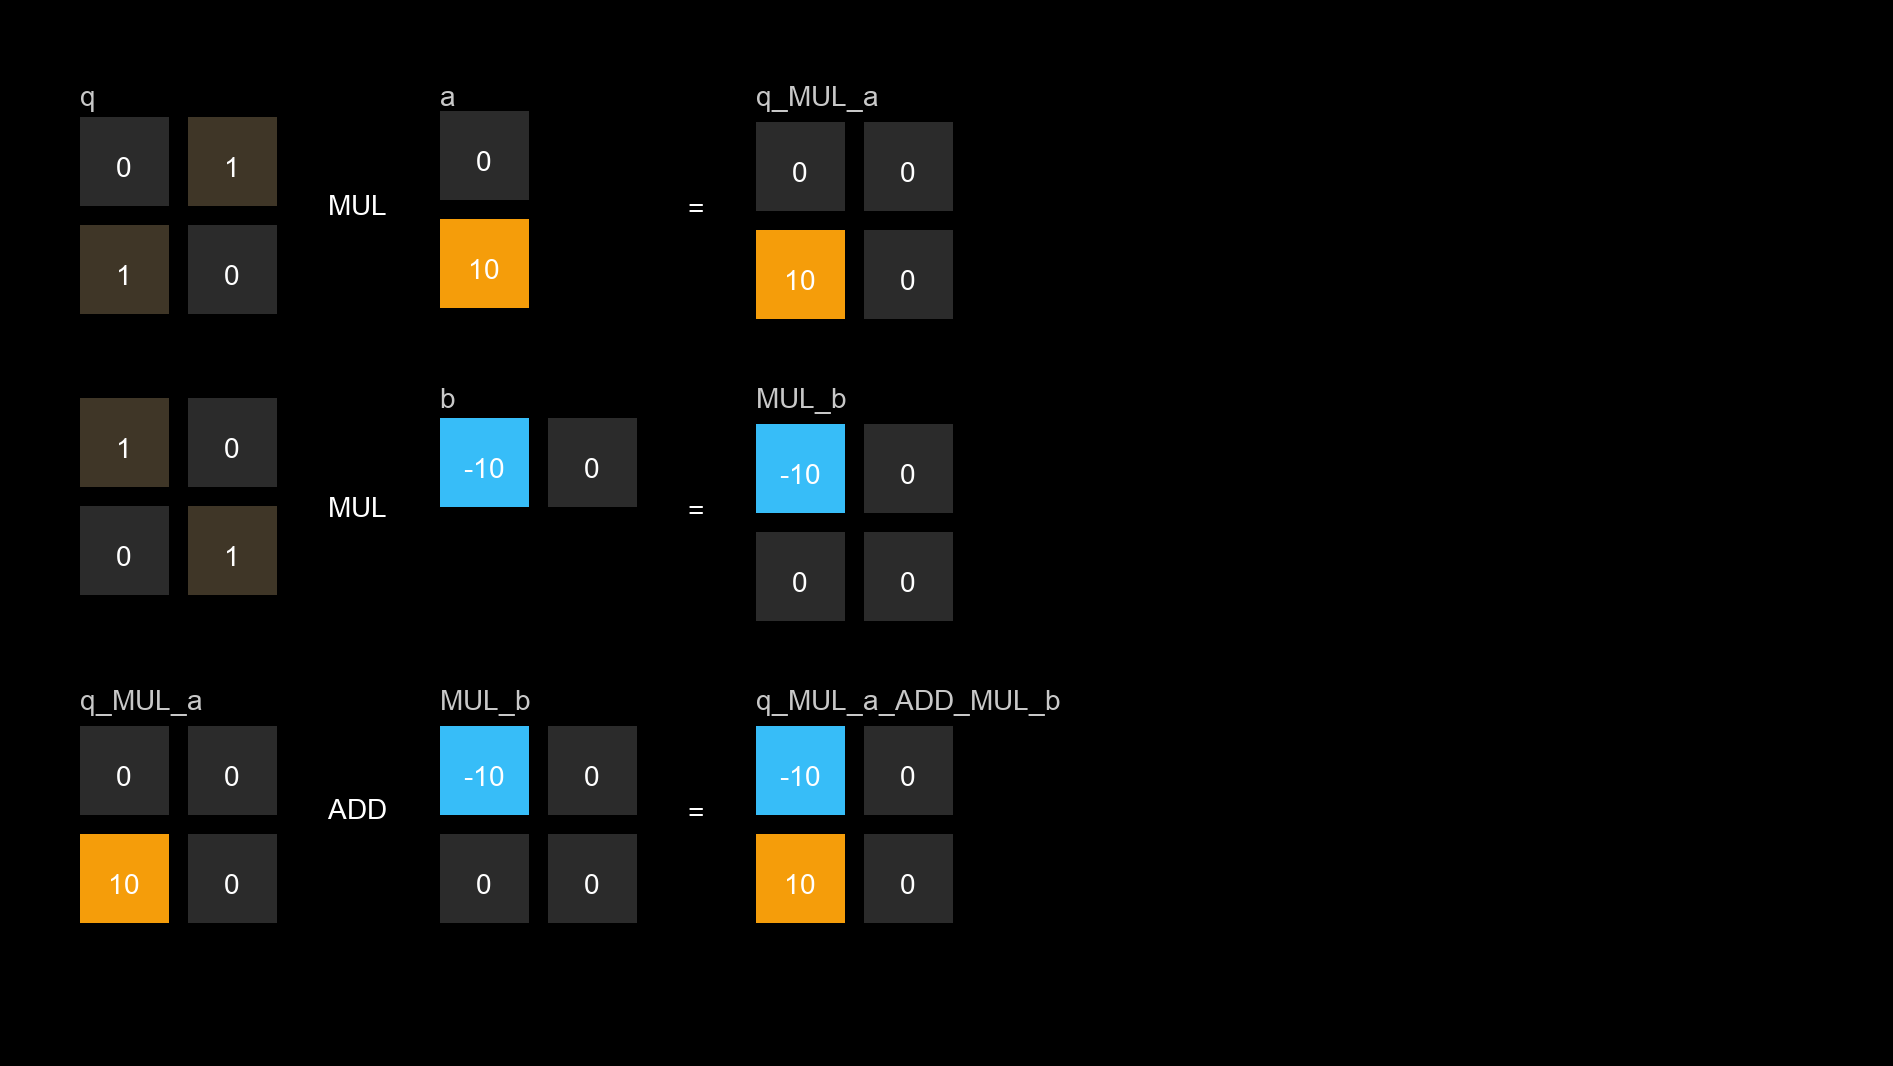

In [4]:
graph.clear()
# --- example usage ---
def where(q, a, b):
  return q * a + q.logical_not() * b

q = Tensor([[False, True], [True, False]])
a = Tensor([[0], [10]])
b = Tensor([-10, 0])

result = where(q, a, b)

# Visualize the graph in dark mode (requires a notebook / SVG display).
try:
  show_graph(graph, title="where")
except Exception:
  pass

In [5]:
!uv pip install -U cleon -q
import cleon

In [6]:
import sys
from pathlib import Path

ROOT = Path.cwd()  # bump to parent if the notebook lives in a subdir
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from lib import TinyType as TT, draw_examples, make_test, run_test

In [7]:
from tinygrad import Tensor, dtypes
import numpy as np

## arange

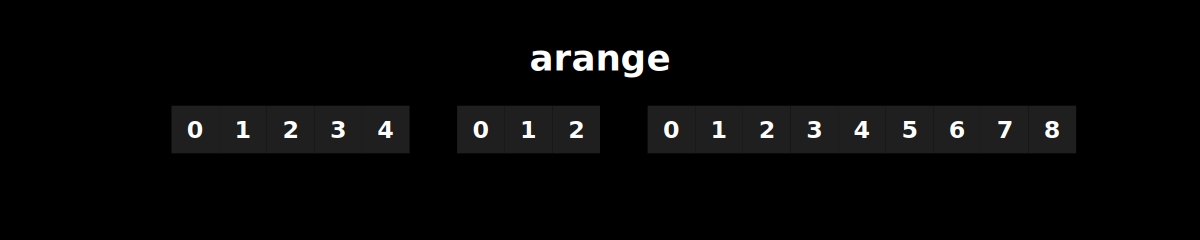

In [8]:
from solutions import arange

draw_examples("arange", [{"": arange(i)} for i in [5, 3, 9]], display_values=True)

In [10]:
def arrange(dims):
    return Tensor(list(range(dims)))
[arrange(i) for i in [5, 3, 9]]

[<Tensor <UOp METAL (5,) int (<Ops.COPY: 10>, None)> on METAL with grad None>,
 <Tensor <UOp METAL (3,) int (<Ops.COPY: 10>, None)> on METAL with grad None>,
 <Tensor <UOp METAL (9,) int (<Ops.COPY: 10>, None)> on METAL with grad None>]

In [38]:
import rememberit
# rememberit.login("email@example.com", "password")  # first time only
decks = rememberit.sync()

deck_data = {
    "name": "Tinygrad Basics",
    "cards": [
        # Concepts
        {"front": "What does Tensor.arange(n) produce in tinygrad?", "back": "A 1-D tensor with values [0, 1, ..., n-1] (int by default, supports dtype/device)."},
        {"front": "How is where(q, a, b) conceptually executed?", "back": "It selects a where q is True and b where False; computes both branches then blends with the mask."},
        {"front": "How does broadcasting work in where?", "back": "q, a, b broadcast to a common shape; scalars or smaller dims expand to match the larger tensor shape."},
        {"front": "What does Tensor.logical_not() return?", "back": "A boolean tensor True where input is False; useful for masks in where."},
        {"front": "Difference between creating a tensor and assigning into one?", "back": "Creation allocates new storage (Tensor([...]); assign mutates existing storage (optionally via slice)."},
        {"front": "How to mutate part of a tensor?", "back": "Use slicing plus .assign, e.g., t[1:3].assign(Tensor([9,9]))."},
        {"front": "What happens when you multiply a bool tensor by another tensor?", "back": "Bool is cast to 0/1, so it masks the other tensor."},

        # Code
        {"front": "Create an int arange of length 5.", "back": "from tinygrad import Tensor\nt = Tensor.arange(5)  # [0,1,2,3,4]", "back_type": "code"},
        {"front": "Implement where(q, a, b) using tinygrad ops.", "back": "def where(q, a, b):\n    return q * a + q.logical_not() * b", "back_type": "code"},
        {"front": "Masked select with broadcasting (bool mask 2x2, scalar a, vector b).", "back": "q = Tensor([[False, True],[True, False]])\na = Tensor([1])       # broadcast scalar-like\nb = Tensor([-10, 0])  # shape (2,)\nout = q * a + q.logical_not() * b", "back_type": "code"},
        {"front": "In-place fill a tensor with zeros then assign new values.", "back": "from tinygrad import Tensor, dtypes\nt = Tensor.zeros(3, dtype=dtypes.int)\nt.assign(Tensor([10, 20, 30]))", "back_type": "code"},
        {"front": "Slice-assign to change part of a tensor.", "back": "t = Tensor.arange(5)\nt[1:3].assign(Tensor([9, 9]))  # -> [0,9,9,3,4]", "back_type": "code"},
        {"front": "Create a random normal matrix on Metal (if available).", "back": "from tinygrad import Tensor\nt = Tensor.randn(2, 3, device=\"METAL\")", "back_type": "code"},
        {"front": "Reshape without copy.", "back": "t = Tensor.arange(6).reshape(2, 3)", "back_type": "code"},
        {"front": "Concatenate two tensors along dim 0.", "back": "a = Tensor.arange(3)\nb = Tensor([10, 11, 12])\nc = Tensor.cat([a, b], dim=0)", "back_type": "code"},
        {"front": "Sum over axis with keepdim.", "back": "t = Tensor.arange(6).reshape(2,3)\ns = t.sum(axis=1, keepdim=True)  # shape (2,1)", "back_type": "code"},
        {"front": "Matrix multiply two float tensors.", "back": "x = Tensor.randn(2, 3)\nw = Tensor.randn(3, 4)\ny = x @ w  # or x.matmul(w)", "back_type": "code"},
    ],
}

rememberit.upsert_deck(deck_data)

Deck(id=1764424896179, path='Tinygrad Basics', cards=17)

In [11]:
# to learn conceptually
# a for loop is a range of numbers, but a-range aka arange gives you a vector of those numbers
# you could then use that vector to get n different results i suppose

In [12]:
# to learn code
# def arrange(dims):
#     return Tensor(list(range(i)))

In [13]:
@ how do you set values to tensors in tinygrad?

## where

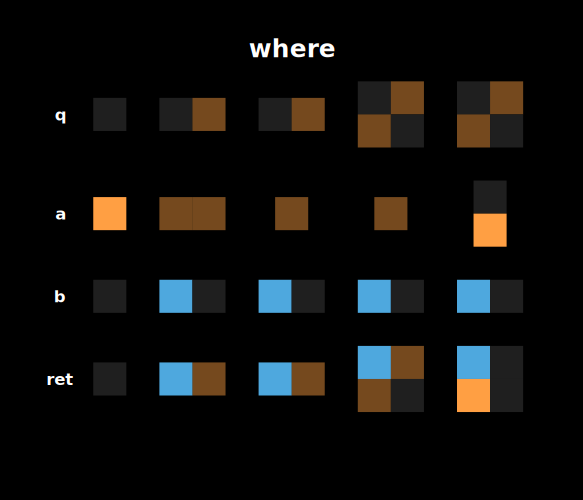

In [14]:
from solutions import where


examples = [
  (Tensor([False]), Tensor([10]), Tensor([0])),
  (Tensor([False, True]), Tensor([1, 1]), Tensor([-10, 0])),
  (Tensor([False, True]), Tensor([1]), Tensor([-10, 0])),
  (Tensor([[False, True], [True, False]]), Tensor([1]), Tensor([-10, 0])),
  (Tensor([[False, True], [True, False]]), Tensor([[0], [10]]), Tensor([-10, 0])),
]
draw_examples(
  "where", [{"q": q, "a": a, "b": b, "ret": where(q, a, b)} for q, a, b in examples]
)

In [15]:
x = (Tensor([[False, True], [True, False]]), Tensor([[0], [10]]), Tensor([-10, 0]))

In [16]:
x

(<Tensor <UOp METAL (2, 2) bool (<Ops.COPY: 10>, None)> on METAL with grad None>,
 <Tensor <UOp METAL (2, 1) int (<Ops.COPY: 10>, None)> on METAL with grad None>,
 <Tensor <UOp METAL (2,) int (<Ops.COPY: 10>, None)> on METAL with grad None>)

In [17]:
# def my_where(q, a, b):
#     ret = Tensor.zeros(q.shape)
#     print(ret)
#     print(q.tolist())
#     for i, c in enumerate(q):
#         print(c.tolist())
#         for j, r in enumerate(c):
#             print("r", r.tolist())
#             ret[i, j] = r.squeeze(-1)

#     print(ret.tolist())
#     return ret


# res = my_where(*x)

In [18]:
from tinyviz import record_graph

In [19]:
def where(q, a, b):
    return q * a + q.logical_not() * b

with graph:
    where(*x)

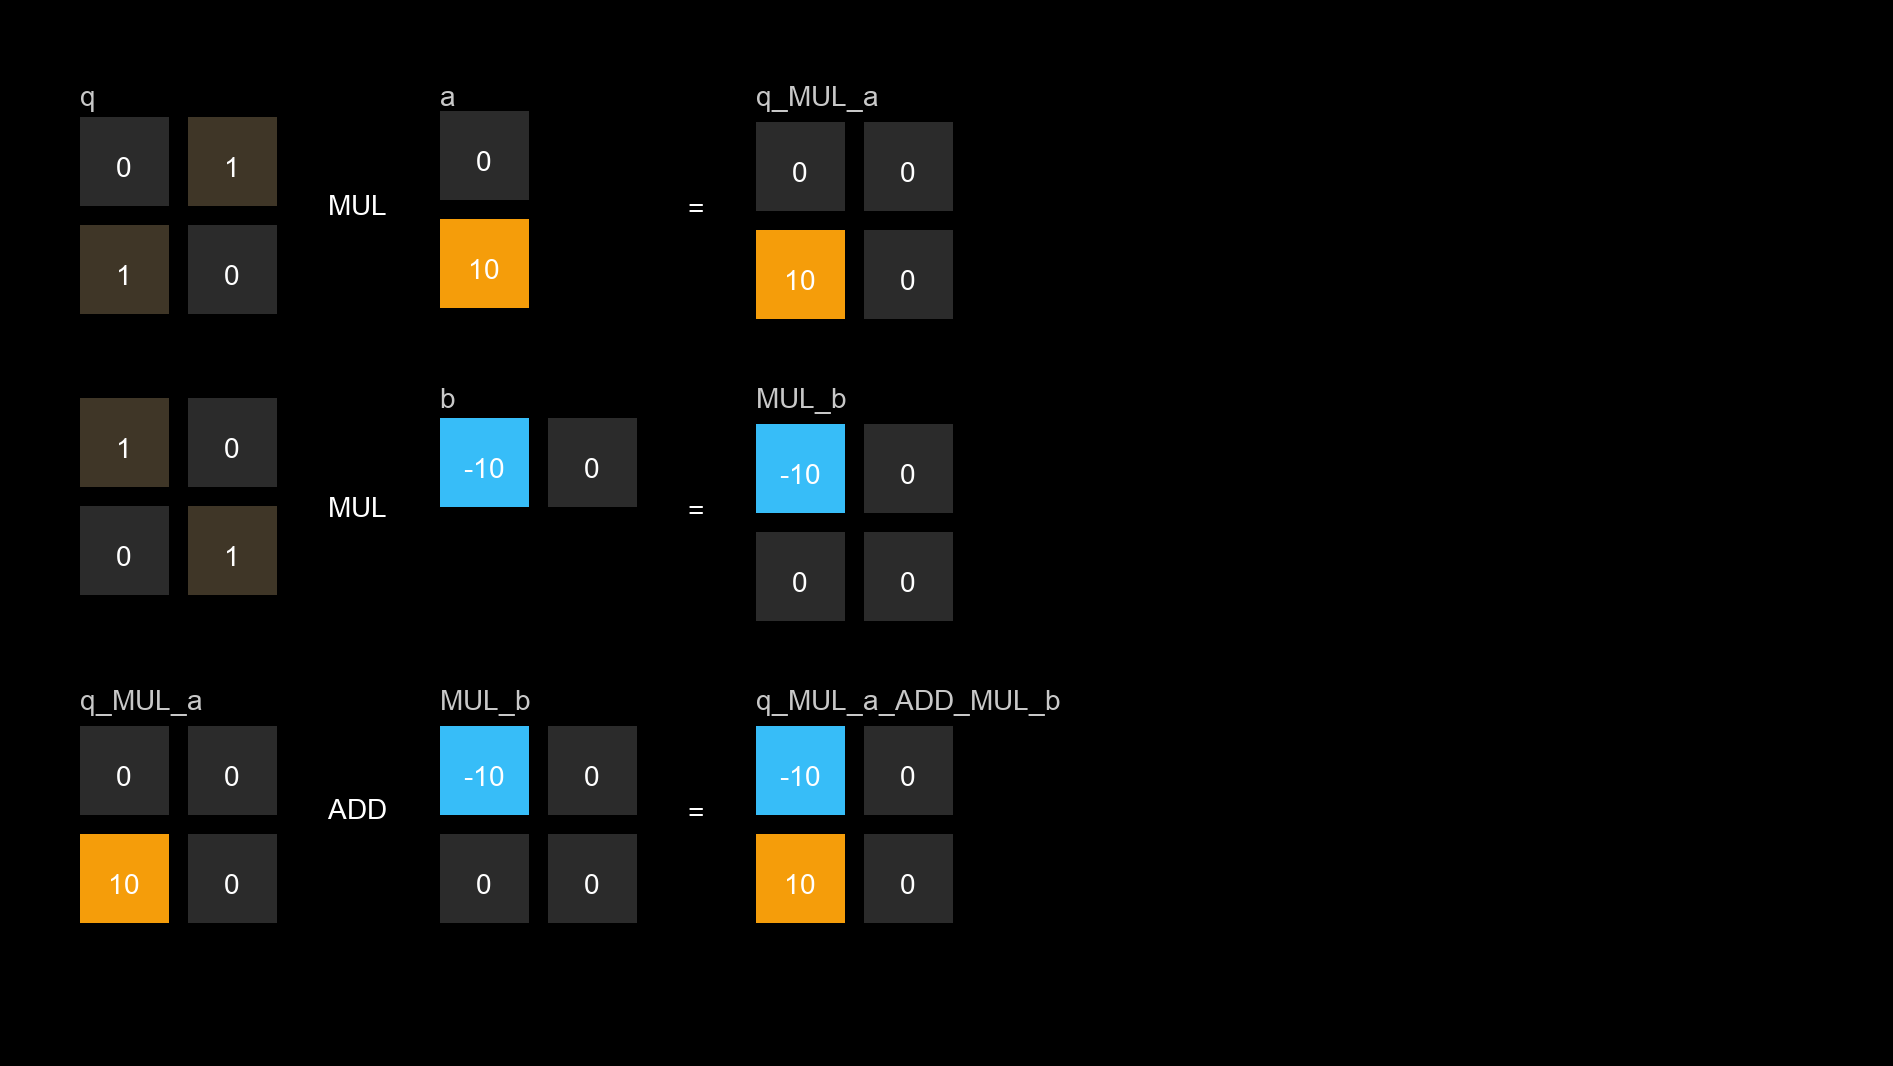

In [20]:
try:
  show_graph(graph, title="where")
except Exception:
  pass

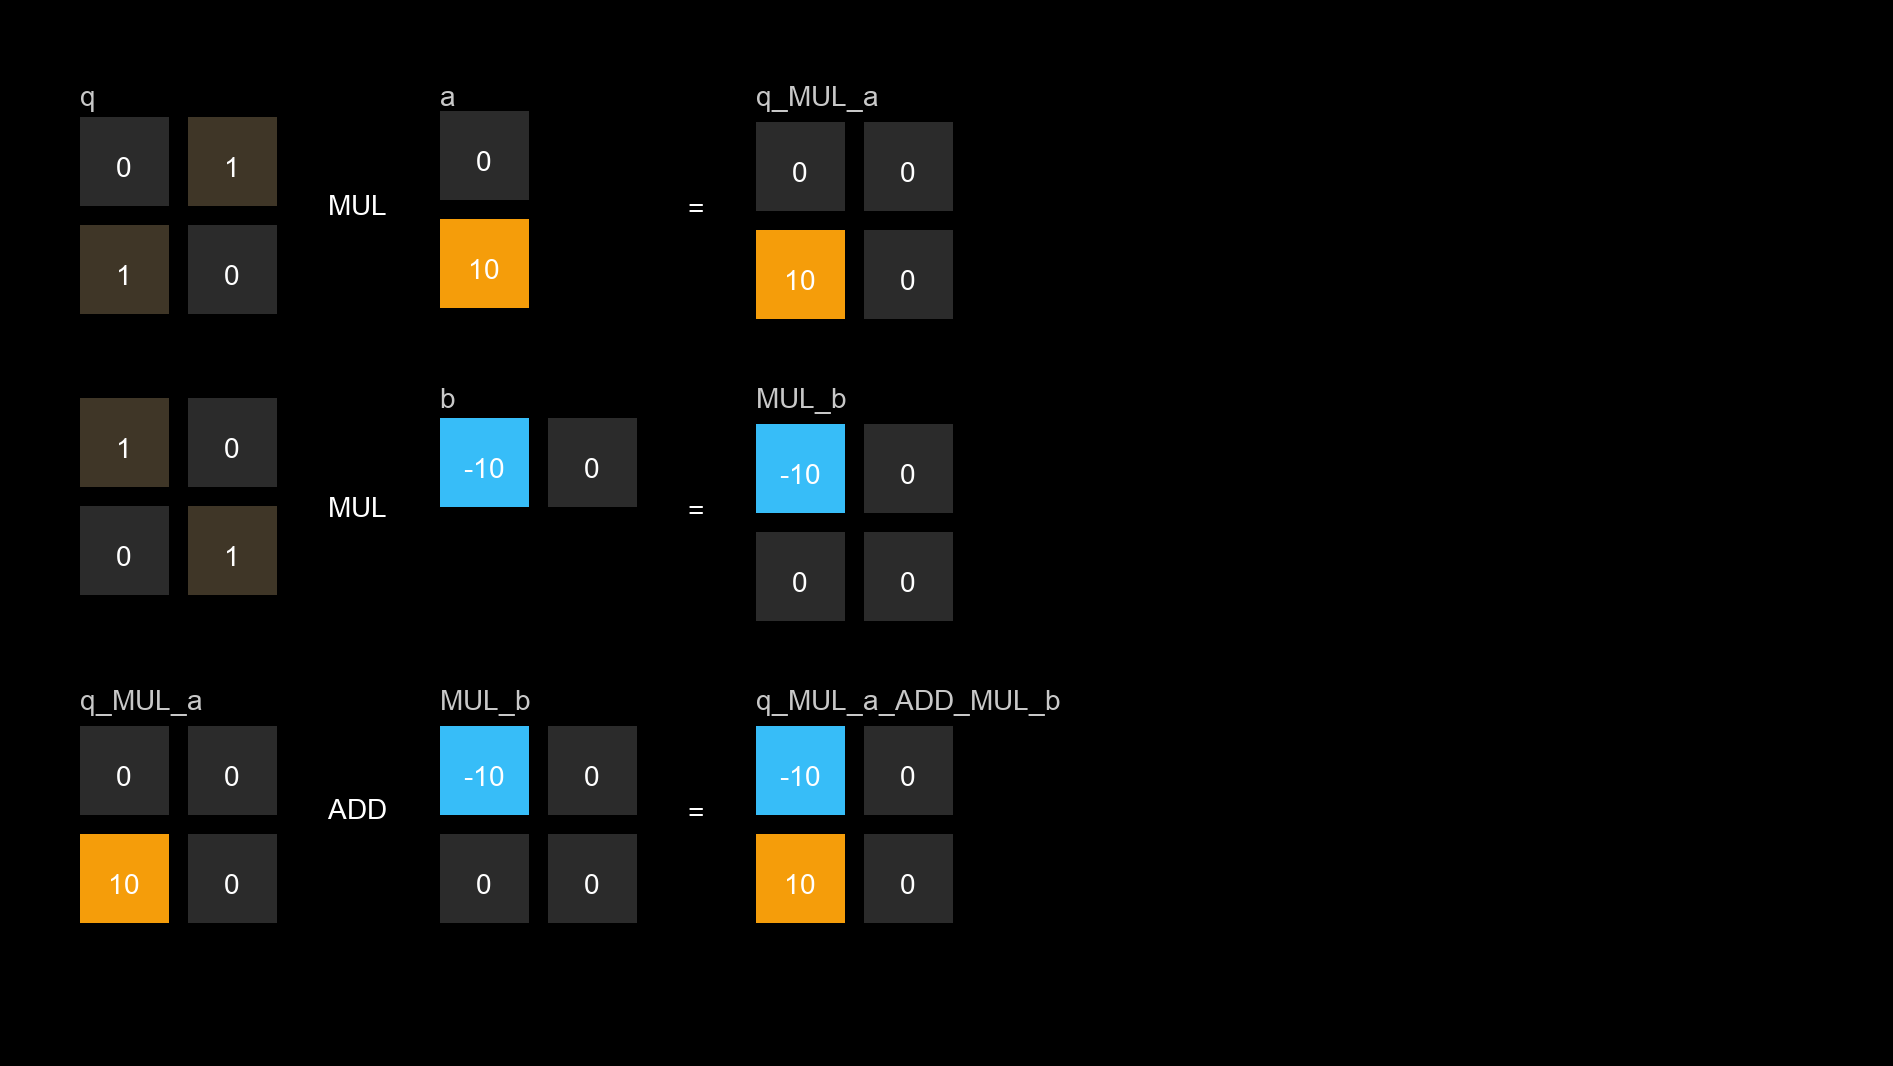

In [21]:
graph

In [22]:
# to learn concept
# conceptually where is an if statement and to process it in parallel you must do both branches
# the output is the same shape as the input as you want a single answer for each input
# if the branches a and b or different shapes you broadcast the query into them

In [24]:
# to learn code
# def where(q, a, b):
#     return q * a + q.logical_not() * b


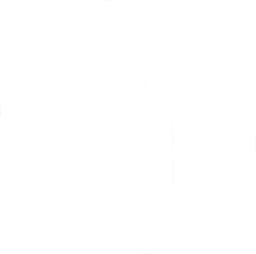


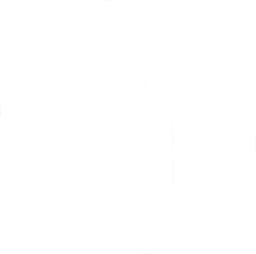

In [25]:
@ what tensor operations do i have to work with?

In [30]:
!uv pip install rememberit

Resolved 15 packages in 829ms                                        
Prepared 1 package in 622ms                                              
Installed 7 packages in 15ms                                
 + anki==25.9.2
 + markdown==3.10
 + orjson==3.11.4
 + protobuf==6.33.1
 + pysocks==1.7.1
 + rememberit==0.1.7
 + zstandard==0.25.0


In [31]:
import rememberit

In [32]:
rememberit.llmtxt()

Type,Description
(default),Styled card with random gradient
code,Syntax-highlighted code block
plain,"Plain text, no formatting"



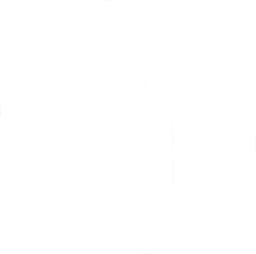

In [33]:
@ give me a new rememberit anki deck for tinygrad including the two functions i have learned today and other useful methods
I want cards on the concepts, i want code cards on the actual code


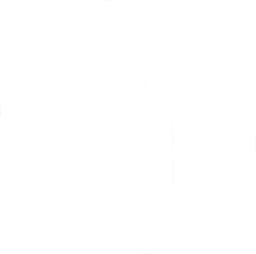

In [34]:
@ give them to me as the json plus python commands to add them with rememberit using the code above

In [35]:
rememberit.help()

Function,Description
"login(email, password)",Authenticate and save sync key
logout(),Clear saved credentials
sync(),"Sync with AnkiWeb, return decks"
decks(),Return cached decks
create_deck(name),Create a new deck
delete_deck(deck),Delete by name/id/object
"rename_deck(deck, new_name)",Rename a deck
upsert_deck(data),Add/update cards from dict/JSON
Function,Description
"format_code(code, lang)",Format code with syntax highlighting


In [36]:
"""
import rememberit

# rememberit.login("email@example.com", "password")  # first time only
decks = rememberit.sync()

deck_data = {
    "name": "Python Basics",
    "cards": [
        # Styled card (default) - random gradient theme
        {"front": "What is Python?", "back": "A programming language"},

        # Code answer with syntax highlighting
        {
            "front": "Write a function to add two numbers",
            "back": "def add(a, b):\n    return a + b",
            "back_type": "code",
        },
    ]
}
rememberit.upsert_deck(deck_data)
Card Schema
{
    "front": str | callable,      # Question (or pass a function!)
    "back": str | callable,       # Answer (or pass a function!)
    "front_type": str,            # Default: styled card | "code" | "plain"
    "back_type": str,             # Default: styled card | "code" | "plain"
    "front_lang": str,            # For code type (default: "python")
    "back_lang": str,
    "front_theme": str,           # For card type (default: "random")
    "back_theme": str,
    "tags": str,                  # Space-separated tags
}
"""

'\nimport rememberit\n\n# rememberit.login("email@example.com", "password")  # first time only\ndecks = rememberit.sync()\n\ndeck_data = {\n    "name": "Python Basics",\n    "cards": [\n        # Styled card (default) - random gradient theme\n        {"front": "What is Python?", "back": "A programming language"},\n\n        # Code answer with syntax highlighting\n        {\n            "front": "Write a function to add two numbers",\n            "back": "def add(a, b):\n    return a + b",\n            "back_type": "code",\n        },\n    ]\n}\nrememberit.upsert_deck(deck_data)\nCard Schema\n{\n    "front": str | callable,      # Question (or pass a function!)\n    "back": str | callable,       # Answer (or pass a function!)\n    "front_type": str,            # Default: styled card | "code" | "plain"\n    "back_type": str,             # Default: styled card | "code" | "plain"\n    "front_lang": str,            # For code type (default: "python")\n    "back_lang": str,\n    "front_theme


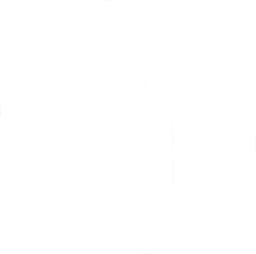

In [37]:
@ use that to give me the json and code in one block to update my anki

## Puzzle 1 - ones

Compute [ones](https://docs.tinygrad.org/tensor/creation/?h=ones#tinygrad.Tensor.ones) - the vector of all ones

In [ ]:
def ones_spec(out):
  for i in range(len(out)):
    out[i] = 1


def ones(i: int) -> TT[["i"]]:
  raise NotImplementedError


test_ones = make_test("one", ones, ones_spec, add_sizes=["i"])

In [ ]:
run_test(test_ones)

## Puzzle 2 - sum

Compute [sum](https://docs.tinygrad.org/tensor/ops/?h=sum#tinygrad.Tensor.sum) - the sum of a vector

In [ ]:
def sum_spec(a, out):
  out[0] = 0
  for i in range(len(a)):
    out[0] += a[i]


def sum(a: TT[["i"]]) -> TT[[1]]:
  raise NotImplementedError


test_sum = make_test("sum", sum, sum_spec, display_values=True)

In [ ]:
run_test(test_sum)

## Puzzle 3 - outer

Compute [outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) - the outer product of two vectors

In [ ]:
def outer_spec(a, b, out):
  for i in range(len(out)):
    for j in range(len(out[0])):
      out[i][j] = a[i] * b[j]


def outer(a: TT[["i"]], b: TT[["j"]]) -> TT[["i", "j"]]:
  raise NotImplementedError


test_outer = make_test("outer", outer, outer_spec, display_values=True)

In [ ]:
run_test(test_outer)

## Puzzle 4 - diag

Compute [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) - the diagonal vector of a square matrix

In [ ]:
def diag_spec(a, out):
  for i in range(len(a)):
    out[i] = a[i][i]


def diag(a: TT[["i", "i"]]) -> TT[["i"]]:
  raise NotImplementedError


test_diag = make_test("diag", diag, diag_spec)

In [ ]:
run_test(test_diag)

## Puzzle 5 - eye

Compute [eye](https://docs.tinygrad.org/tensor/creation/?h=eye#tinygrad.Tensor.eye) - the identity matrix

In [ ]:
def eye_spec(out):
  for i in range(len(out)):
    out[i][i] = 1


def eye(j: int) -> TT[["j", "j"]]:
  raise NotImplementedError


test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [ ]:
run_test(test_eye)

## Puzzle 6 - triu

Compute [triu](https://docs.tinygrad.org/tensor/ops/?h=triu#tinygrad.Tensor.triu) - the upper triangular matrix

In [ ]:
def triu_spec(out):
  for i in range(len(out)):
    for j in range(len(out)):
      if i <= j:
        out[i][j] = 1
      else:
        out[i][j] = 0


def triu(j: int) -> TT[["j", "j"]]:
  raise NotImplementedError


test_triu = make_test("triu", triu, triu_spec, add_sizes=["j"])

In [ ]:
run_test(test_triu)

## Puzzle 7 - cumsum

Compute [cumsum](https://docs.tinygrad.org/tensor/ops/?h=cumsum#tinygrad.Tensor.cumsum) - the cumulative sum

In [ ]:
def cumsum_spec(a, out):
  total = 0
  for i in range(len(out)):
    out[i] = total + a[i]
    total += a[i]


def cumsum(a: TT[["i"]]) -> TT[["i"]]:
  raise NotImplementedError


test_cumsum = make_test("cumsum", cumsum, cumsum_spec, display_values=True)

In [ ]:
run_test(test_cumsum)

## Puzzle 8 - diff

Compute [diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) - the running difference

In [ ]:
def diff_spec(a, out):
  for i in range(1, len(a)):
    out[i - 1] = a[i] - a[i - 1]


def diff(a: TT[["i"]]) -> TT[["i - 1"]]:
  raise NotImplementedError


test_diff = make_test("diff", diff, diff_spec, display_values=True)

In [ ]:
run_test(test_diff)

## Puzzle 9 - vstack

Compute [vstack](https://docs.tinygrad.org/tensor/movement/?h=stack#tinygrad.Tensor.stack) - the matrix of two vectors

In [ ]:
def vstack_spec(a, b, out):
  for i in range(len(out[0])):
    out[0][i] = a[i]
    out[1][i] = b[i]


def vstack(a: TT[["i"]], b: TT[["i"]]) -> TT[[2, "i"]]:
  raise NotImplementedError


test_vstack = make_test("vstack", vstack, vstack_spec)

In [ ]:
run_test(test_vstack)

## Puzzle 10 - roll

Compute [roll](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) - the vector shifted 1 circular position

In [ ]:
def roll_spec(a, out):
  for i in range(len(out)):
    if i + 1 < len(out):
      out[i] = a[i + 1]
    else:
      out[i] = a[i + 1 - len(out)]


def roll(a: TT[["i"]], i: int) -> TT[["i"]]:
  raise NotImplementedError


test_roll = make_test("roll", roll, roll_spec, add_sizes=["i"], display_values=True)

In [ ]:
run_test(test_roll)

## Puzzle 11 - flip

Compute [flip](https://docs.tinygrad.org/tensor/movement/?h=flip#tinygrad.Tensor.flip) - the reversed vector

In [ ]:
def flip_spec(a, out):
  for i in range(len(out)):
    out[i] = a[len(out) - i - 1]


def flip(a: TT[["i"]], i: int) -> TT[["i"]]:
  raise NotImplementedError


test_flip = make_test("flip", flip, flip_spec, add_sizes=["i"])

In [ ]:
run_test(test_flip)

## Puzzle 12 - compress

Compute [compress](https://numpy.org/doc/stable/reference/generated/numpy.compress.html) - keep only masked entries (left-aligned)

In [ ]:
def compress_spec(g, v, out):
  j = 0
  for i in range(len(g)):
    if g[i]:
      out[j] = v[i]
      j += 1


def compress(g: TT[["i"], dtypes.bool], v: TT[["i"]], i: int) -> TT[["i"]]:
  raise NotImplementedError


test_compress = make_test(
  "compress", compress, compress_spec, add_sizes=["i"], display_values=True
)

In [ ]:
run_test(test_compress)

## Puzzle 13 - pad_to

Compute [pad_to](https://docs.tinygrad.org/tensor/movement/?h=pad#tinygrad.Tensor.pad2d) - eliminate or add 0s to change size of vector

In [ ]:
def pad_to_spec(a, out):
  for i in range(min(len(out), len(a))):
    out[i] = a[i]


def pad_to(a: TT[["i"]], j: int) -> TT[["j"]]:
  raise NotImplementedError


test_pad_to = make_test(
  "pad_to", pad_to, pad_to_spec, add_sizes=["j"], display_values=True
)

In [ ]:
run_test(test_pad_to)

## Puzzle 14 - sequence_mask

Compute [sequence_mask](https://www.tensorflow.org/api_docs/python/tf/sequence_mask) - pad out to length per batch

In [ ]:
def sequence_mask_spec(values, length, out):
  for i in range(len(out)):
    for j in range(len(out[0])):
      if j < length[i]:
        out[i][j] = values[i][j]
      else:
        out[i][j] = 0


def sequence_mask(values: TT[["i", "j"]], length: TT[["i"], dtypes.int]) -> TT[["i", "j"]]:  # fmt: skip
  raise NotImplementedError


def constraint_set_length(d):
  d["length"] = d["length"] % d["values"].shape[1]
  return d


test_sequence = make_test(
  "sequence_mask",
  sequence_mask,
  sequence_mask_spec,
  constraint=constraint_set_length,
  display_values=True,
)

In [ ]:
run_test(test_sequence)

## Puzzle 15 - bincount

Compute [bincount](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) - count number of times an entry was seen

In [ ]:
def bincount_spec(a, out):
  for i in range(len(a)):
    out[a[i]] += 1


def bincount(a: TT[["i"]], j: int) -> TT[["j"]]:
  raise NotImplementedError


def constraint_set_max(d):
  d["a"] = d["a"] % d["return"].shape[0]
  return d


test_bincount = make_test(
  "bincount",
  bincount,
  bincount_spec,
  add_sizes=["j"],
  constraint=constraint_set_max,
  display_values=True,
)

In [ ]:
run_test(test_bincount)

## Puzzle 16 - scatter_add

Compute [scatter_add](https://pytorch-scatter.readthedocs.io/en/1.3.0/functions/add.html) - add together values that link to the same location

In [ ]:
def scatter_add_spec(values, index, out):
  for j in range(len(values)):
    out[index[j]] += values[j]


def scatter_add(value: TT[["i"]], index: TT[["i"]], j: int) -> TT[["j"]]:
  raise NotImplementedError


def constraint_set_max(d):
  d["index"] = d["index"] % d["return"].shape[0]
  return d


test_scatter_add = make_test(
  "scatter_add",
  scatter_add,
  scatter_add_spec,
  add_sizes=["j"],
  constraint=constraint_set_max,
  display_values=True,
)

In [ ]:
run_test(test_scatter_add)

## Puzzle 17 - flatten

Compute [flatten](https://docs.tinygrad.org/tensor/movement/?h=flatt#tinygrad.Tensor.flatten)

In [ ]:
def flatten_spec(a, out):
  k = 0
  for i in range(len(a)):
    for j in range(len(a[0])):
      out[k] = a[i][j]
      k += 1


def flatten(a: TT[["i", "j"]]) -> TT[["i * j"]]:
  raise NotImplementedError


test_flatten = make_test("flatten", flatten, flatten_spec)

In [ ]:
run_test(test_flatten)

## Puzzle 18 - linspace

Compute [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [ ]:
def linspace_spec(i, j, out):
  for k in range(len(out)):
    out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


def linspace(i: TT[[1]], j: TT[[1]], n: int) -> TT[["n"], dtypes.float]:
  raise NotImplementedError


test_linspace = make_test(
  "linspace", linspace, linspace_spec, add_sizes=["n"], display_values=True
)

In [ ]:
run_test(test_linspace)

## Puzzle 19 - heaviside

Compute [heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html)

In [ ]:
def heaviside_spec(a, b, out):
  for k in range(len(out)):
    if a[k] == 0:
      out[k] = b[k]
    else:
      out[k] = int(a[k] > 0)


def heaviside(a: TT[["i"]], b: TT[["i"]]) -> TT[["i"]]:
  raise NotImplementedError


test_heaviside = make_test("heaviside", heaviside, heaviside_spec, display_values=True)

In [ ]:
run_test(test_heaviside)

## Puzzle 20 - repeat (1d)

Compute [repeat](https://docs.tinygrad.org/tensor/movement/?h=repeat#tinygrad.Tensor.repeat)

In [ ]:
def repeat_spec(a, d, out):
  for i in range(d[0]):
    for k in range(len(a)):
      out[i][k] = a[k]


def constraint_set(d):
  d["d"][0] = d["return"].shape[0]
  return d


def repeat(a: TT[["i"]], d: TT[[1]]) -> TT[["d", "i"]]:
  raise NotImplementedError


test_repeat = make_test("repeat", repeat, repeat_spec, constraint=constraint_set)

In [ ]:
run_test(test_repeat)

In [ ]:
def bucketize_spec(v, boundaries, out):
  for i, val in enumerate(v):
    out[i] = 0
    for j in range(len(boundaries) - 1):
      if val >= boundaries[j]:
        out[i] = j + 1
    if val >= boundaries[-1]:
      out[i] = len(boundaries)


def constraint_set(d):
  d["boundaries"] = np.abs(d["boundaries"]).cumsum()
  return d


def bucketize(v: TT[["i"]], boundaries: TT[["j"]]) -> TT[["i"]]:
  raise NotImplementedError


test_bucketize = make_test(
  "bucketize", bucketize, bucketize_spec, constraint=constraint_set, display_values=True
)

In [ ]:
run_test(test_bucketize)

Check the number of lines

In [ ]:
import inspect

fns = (
  ones,
  sum,
  outer,
  diag,
  eye,
  triu,
  cumsum,
  diff,
  vstack,
  roll,
  flip,
  compress,
  pad_to,
  sequence_mask,
  bincount,
  scatter_add,
  flatten,
  linspace,
  heaviside,
  repeat,
  # bucketize, # TODO: why does this throw an error
)

for fn in fns:
  lines = [
    l for l in inspect.getsource(fn).split("\n") if not l.strip().startswith("#")
  ]

  if len(lines) > 3:
    print(fn.__name__, len(lines[2]), "(more than 1 line)")
  else:
    print(fn.__name__, len(lines[1]))